In [185]:
import sys
def category_encoders():
    package = 'category_encoders'
    try:
        return __import__(package)
    except ImportError:
        import sys
        !{sys.executable} -m pip install category_encoders
        return None


def imbalanced_learn():
    package = 'imbalanced-learn'
    try:
        return __import__(package)
    except ImportError:
        import sys
        !{sys.executable} -m pip install -U imbalanced-learn
        return None


def delayed():
    package = 'delayed'
    try:
        return __import__(package)
    except ImportError:
        import sys
        !{sys.executable} -m pip install delayed
        return None


In [186]:
category_encoders()
imbalanced_learn()
delayed()

Requirement already up-to-date: imbalanced-learn in /home/caio/anaconda3/lib/python3.8/site-packages (0.8.0)


<module 'delayed' from '/home/caio/anaconda3/lib/python3.8/site-packages/delayed/__init__.py'>

In [237]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import math
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score,recall_score,accuracy_score, confusion_matrix, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

In [188]:
def mean(l):
    acc = 0
    for i in l:
        acc+=i
    return acc/(len(l))

In [189]:
def std(l):
    m = mean(l)
    acc = 0
    for i in l:
        acc+= (i - m)**2
    return math.sqrt(acc/(len(l)))

In [190]:
plt.rcParams["figure.figsize"] = (12, 7)

In [191]:
df = pd.read_csv("../raw_data.csv")
# df = pd.read_csv("../final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Editora       3917 non-null   object 
 1   ISBN          3917 non-null   object 
 2   Ano           3917 non-null   float64
 3   Edição        3917 non-null   float64
 4   Origem        3917 non-null   object 
 5   Encadernação  3917 non-null   object 
 6   Idioma        3917 non-null   object 
 7   País          3917 non-null   object 
 8   Páginas       3917 non-null   float64
 9   preço         3917 non-null   float64
 10  nome          3917 non-null   object 
 11  categoria     3917 non-null   object 
 12  Autores       3916 non-null   object 
dtypes: float64(4), object(9)
memory usage: 397.9+ KB


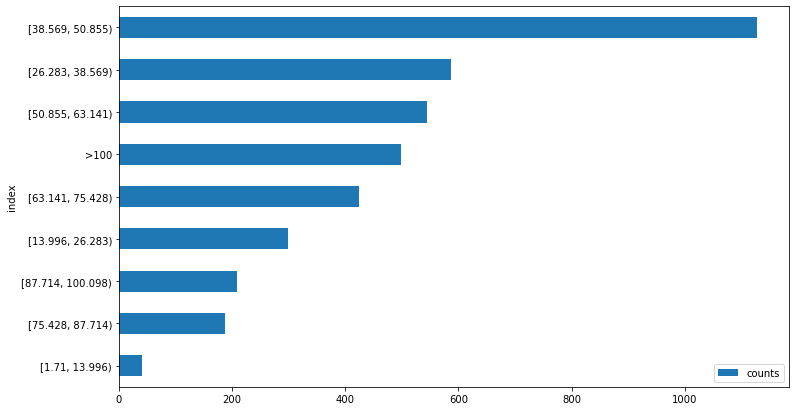

In [192]:
df.loc[df['preço']<=100,'preço_cat'] = pd.cut(df[df['preço']<=100]['preço'], bins=8, right=False)
df['preço_cat'] = df['preço_cat'].fillna('>100')
counts = df['preço_cat'].value_counts().reset_index(name="counts").sort_values(by='counts',ascending=True)
counts.plot(x='index',y='counts',kind='barh')
plt.show()

In [184]:
df = df.drop(df[df['preço_cat']=='>100'].index)

In [193]:
X = df[['Ano','Edição','Páginas']]
y = df['preço_cat']

In [194]:
y = y.to_numpy().astype(str)

In [195]:
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=64)

In [196]:
model = GaussianNB()
scores = cross_val_score(model, X, y, cv=cv_outer,scoring='f1_micro',n_jobs=-1)
print(scores)
print(f'Pontuação f1 média: {scores.mean()}')

[0.28316327 0.21173469 0.31122449 0.29081633 0.30867347 0.30357143
 0.13010204 0.16112532 0.28388747 0.27109974]
Pontuação f1 média: 0.2555398246255024


In [197]:
encoder=ce.OneHotEncoder(cols='Origem',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Origem','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Origem_NACIONAL,Origem_IMPORTADO,preço
0,1.0,0.0,49.90
1,1.0,0.0,59.90
2,1.0,0.0,130.00
3,1.0,0.0,38.42
4,1.0,0.0,49.90
...,...,...,...
3912,1.0,0.0,114.00
3913,1.0,0.0,98.00
3914,1.0,0.0,49.90
3915,1.0,0.0,84.90


In [198]:
X = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [199]:
encoder=ce.OneHotEncoder(cols='País',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['País','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,País_BRASIL,País_ESTADOS UNIDOS,País_FRANÇA,País_INGLATERRA,País_PORTUGAL,País_ESPANHA,País_ALEMANHA,País_ITALIA,País_MEXICO,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.42
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.90


In [200]:
X = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [201]:
encoder=ce.OneHotEncoder(cols='Idioma',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Idioma','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Idioma_PORTUGUÊS,Idioma_INGLÊS,Idioma_PORT. PORTUGAL,Idioma_ESPANHOL,Idioma_FRANCÊS,Idioma_ITALIANO,Idioma_JAPONÊS,Idioma_ALEMÃO,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.42
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.90


In [202]:
X = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [203]:
encoder=ce.OneHotEncoder(cols='Encadernação',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Encadernação','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Encadernação_BROCHURA,Encadernação_CAPA DURA,Encadernação_LÂMINA,Encadernação_FLEXIVEL,Encadernação_CAPA DURA C/SOBRECAP,Encadernação_ESPIRAL,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,38.42
4,0.0,1.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,0.0,1.0,0.0,0.0,0.0,0.0,84.90


In [204]:
X = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [205]:
encoder= ce.BaseNEncoder(cols=['categoria'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['categoria','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,categoria_0,categoria_1,categoria_2,categoria_3,preço
0,0,0,0,1,49.90
1,0,0,0,2,59.90
2,0,0,0,2,130.00
3,0,0,0,3,38.42
4,0,0,0,3,49.90
...,...,...,...,...,...
3912,0,1,2,3,114.00
3913,0,1,2,3,98.00
3914,0,1,2,3,49.90
3915,0,1,2,4,84.90


In [206]:
X = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [207]:
encoder= ce.BaseNEncoder(cols=['Editora'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['Editora','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Editora_0,Editora_1,Editora_2,Editora_3,Editora_4,preço
0,0,0,0,0,1,49.90
1,0,0,0,0,2,59.90
2,0,0,0,0,3,130.00
3,0,0,0,0,4,38.42
4,0,0,0,1,0,49.90
...,...,...,...,...,...,...
3912,0,0,0,1,4,114.00
3913,0,0,0,1,4,98.00
3914,0,0,0,1,4,49.90
3915,0,3,4,3,3,84.90


In [208]:
X = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [209]:
encoder= ce.BaseNEncoder(cols=['Autores'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['Autores','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Autores_0,Autores_1,Autores_2,Autores_3,Autores_4,Autores_5,preço
0,0,0,0,0,0,1,49.90
1,0,0,0,0,0,2,59.90
2,0,0,0,0,0,3,130.00
3,0,0,0,0,0,4,38.42
4,0,0,0,0,1,0,49.90
...,...,...,...,...,...,...,...
3912,0,4,2,3,1,0,114.00
3913,0,4,4,0,1,3,98.00
3914,0,4,2,3,0,4,49.90
3915,0,4,3,2,0,0,84.90


In [210]:
X = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ano                                3917 non-null   float64
 1   Edição                             3917 non-null   float64
 2   Páginas                            3917 non-null   float64
 3   Origem_NACIONAL                    3917 non-null   float64
 4   Origem_IMPORTADO                   3917 non-null   float64
 5   País_BRASIL                        3917 non-null   float64
 6   País_ESTADOS UNIDOS                3917 non-null   float64
 7   País_FRANÇA                        3917 non-null   float64
 8   País_INGLATERRA                    3917 non-null   float64
 9   País_PORTUGAL                      3917 non-null   float64
 10  País_ESPANHA                       3917 non-null   float64
 11  País_ALEMANHA                      3917 non-null   float

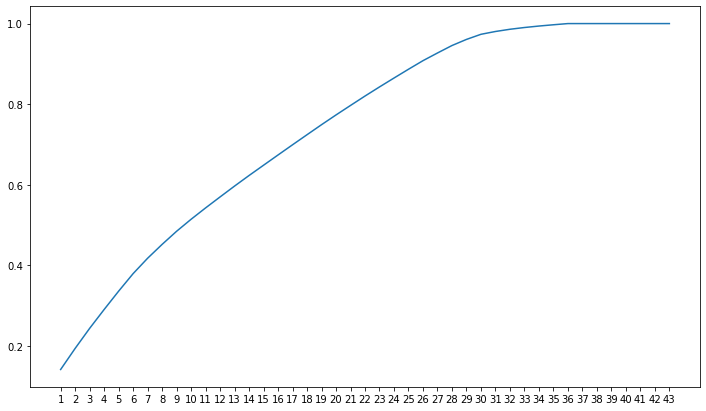

In [212]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA().fit(X_scaled)
variances = np.cumsum(pca.explained_variance_ratio_)
ticks = np.arange(1, X.shape[1]+1, step=1)
plt.plot(ticks,variances)
plt.xticks(ticks)
plt.show()

In [213]:
feature_number = 35

In [244]:
def cross_eval(X,y,pipe,cv,oversampler):
    results = []
    X_ = X.to_numpy()
    for train_ix, test_ix in cv.split(X):
        # split data
        X_train, X_test = X_[train_ix, :], X_[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]
        #Over-sampling
        X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
        # print(f'X_train.shape={X_train.shape};\ty_train.shape={y_train.shape}\tX_train_oversampled.shape={X_train_oversampled.shape};\ty_train_oversampled.shape={y_train_oversampled.shape}')
        # print(f'Exemplos por classe')
        # test = pd.DataFrame(y_train_oversampled,columns=['y'])
        # print(test['y'].value_counts())
        #Training
        pipe.fit(X_train_oversampled, y_train_oversampled)
        #Testing
        y_pred = pipe.predict(X_test)
        # test = pd.DataFrame(y_pred,columns=['y'])
        # print(test['y'].value_counts())
        metrics = {}
        metrics['precision'] = precision_score(y_test, y_pred,zero_division=1, average='macro')
        metrics['recall'] = recall_score(y_test, y_pred, average='macro')
        metrics['f1'] = f1_score(y_test, y_pred, average='macro')

        le = preprocessing.LabelEncoder()
        le.fit(y)
        y_test_ = le.transform(y_test)
        metrics['roc_auc'] = roc_auc_score(y_test_, pipe.predict_proba(X_test),multi_class='ovr')
        results.append(metrics)
    return results

In [245]:
oversampler = SMOTE(random_state=42)
pipe = Pipeline([ ('scaler', StandardScaler()) , ('pca', PCA(n_components=feature_number)) , ('cls',GaussianNB()) ])
results = cross_eval(X,y,pipe,cv_outer,oversampler)

In [246]:
df_results = pd.DataFrame(results)
df_results

,precision,recall,f1,roc_auc
0,0.349083,0.182029,0.109169,0.615400
1,0.335023,0.189685,0.092124,0.602048
2,0.415695,0.159571,0.069965,0.612267
3,0.426189,0.174986,0.064433,0.581896
4,0.581604,0.145154,0.104920,0.577402
5,0.454121,0.184320,0.101603,0.584905
6,0.342481,0.101146,0.084761,0.546278
7,0.357163,0.137044,0.086812,0.550286
8,0.230407,0.183922,0.085143,0.590951
9,0.460033,0.146382,0.095727,0.556054


In [247]:
df_results.describe()

,precision,recall,f1,roc_auc
count,10.000000,10.000000,10.000000,10.000000
mean,0.395180,0.160424,0.089466,0.581749
std,0.094829,0.028186,0.014435,0.024715
min,0.230407,0.101146,0.064433,0.546278
25%,0.344131,0.145461,0.084856,0.561391
50%,0.386429,0.167278,0.089468,0.583400
75%,0.447138,0.183449,0.100134,0.599274
max,0.581604,0.189685,0.109169,0.615400
